# Programming in Python for Data Science - CS3PP19
**Twitter network map data extraction, pre-processing, and analysis**
<hr style="border:2px solid gray"> </hr>

- **Module Code**: CS3PP19
- **Assignment report Title**: Twitter Data extraction and Network analysis
- **Student Number**: 28000050, 27011359, 28001144
- **Date**: 28/11/2021
- **Actual hrs spent for the assignment**: 22
- **Assignment evaluation**: Impressive, Great for portfolio, Interesting

## Introduction
Social media platforms have been playing the backbone role of our social interaction and activity for a fair amount of time now, so it is inevitable for someone to say that it affects our lives, in ways and fields we cannot possibly imagine. We discover, learn and share information, interact with individuals and organizations, we buy/sell products, and most importantly we communicate. Now the question is, why do we need different platforms? More money for owners? Well, sure. But what if in a hypothetical scenario, social media platforms were embrassing rules from Survival of the Fittest between them. Who would prevail and why?

Twitter is a social platform built to prevail. The reason is behind the fact that, not only it withholds a high-standard environment and UI, but it can fulfill most of the social platforms purposes. Sharing, learning, chatting, interacting, communicating, marketing, and so many more. Tick all the boxes because: "Twitter is the bar scene, where people let loose and talk to strangers, drop one-liners (or pick-up lines), and engage with personalities from all walks of life. It is this bar-like atmosphere that makes Twitter the ultimate platform for customer engagement, and for the same reason why Twitter is the ideal social network for marketers." 
(Source: https://www.convinceandconvert.com/social-media-strategy/twitter-engagement/#:~:text=Twitter%20is%20the%20bar,social%20network%20for%20marketers%3A)

In this project, we will extract Twitter data from 4 specified accounts and perform a full Data Science Workflow. This includes gathering, cleaning, and processing the data, aiding to the implementation of a network model alongside with statistical calculations and plots. The access to the Twitter API is granted using an open source Python package called **Tweepy**. The code is implemented using variables for the users, thus it can be extended to search other user's tweets with the change of just one line. The optimal results and visualisations can be shown if each cell is ran one by one with the order that they are written. Rate limits were reached at some points and we tried to counter this but it wasn't possible unfortunately. A note will be marked in Red color to the report's points, were rate limit may be reached. 

---

## Tasks

- **Task 1** - Data Gathering and Pre-processing
- **Task 2** - Exploratory Data Analysis (EDA)
- **Task 3** - Network analysis

---

> <font size="4"> <ins>**Task 1**</ins> - Data Gathering and Pre-processing</font>

This task implements a process to extract the data from the twitter api for the 4 specified accounts. A connection is established to the twitter api and then the data extracted are transformed into a pandas dataframe, enabling us to analyse them. We did include a data cleansing activity while retrieving them from the source, such as filtering the retweets when capturing the id of the tweets, constructing the dataframe with specific columns that were needed, etc.

In [1]:
# The initial imports we will use are tweepy and pandas libraries
import tweepy
import pandas as pd

In order to gain access to the Twitter API, we have been granted a Twitter Developer Account followed with the unique keys and tokens that we have to use for the authentication. These keys should be kept private and discrit. Thus, we have decided instead of using them directly in this notebook to save them into a separate notebook and run it with the command below. Now, we have access to all the variables that we will need for the authentication.

In [2]:
%run ./keys.ipynb #run keys to import variables for twitter keys and tokens

In [3]:
#authentication process and api initialisation
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

**Twitter accounts being used**

The influencers we have chosen to analyse their tweets are:
1. Giannis Antetokoumpo
> The "Greek Freak" of NBA as he is called is a professional basketball player for the Milwaukee Bucks 
2. Arun Maini
> He is known as "Mrwhosetheboss" and the answer, considering that the field is Tech, is him!
3. Nicos Anastasiades
> The current president of Cyprus
4. Thanasis Antetokoumpo
> The "Elevator" of the Bucks basketball team. Brother of Giannis.

In [4]:
#screen_names of the 4 accounts saved into 4 separate variables as shown
user1 = 'Giannis_An34'
user2 = 'Mrwhosetheboss'
user3 = 'AnastasiadesCY'
user4 = 'Thanasis_ante43'

<ins>Data Gathering</ins>

The approach we have chosen to retrieve and save the twitter data is by using the **Tweepy.Cursor** function and search each user's timeline for a fixed amount of tweets, 300. We have created 6 empty lists to append our data on. The tweet mode is set to extented. When using extended mode, the text attribute of Status objects returned by tweepy.API methods is replaced by a full_text attribute, which contains the entire untruncated text of the Tweet. This process will be repeated for all 4 accounts.

The retweeted_twit list is being filled with the ids of the tweets that are original, and not retweets, by filtering all tweets that start with "RT @".This string is what differentiate an original tweet, from a retweet. We do that in order to find the most retweeted tweet among the accounts, but considering only their own original tweets.

In [5]:
# USER1
number_of_tweets = 300 
name = [] 
tweets = [] 
likes = [] 
time = [] #date and time posted
retweeted_twit = [] #capture id of the twit for later use

# Run through user's timeline to gather each tweet's information 
for i in tweepy.Cursor(api.user_timeline, screen_name = user1, tweet_mode = "extended").items(number_of_tweets):
    name.append(i.user.screen_name) # name of user 
    tweets.append(i.full_text)      # actual tweet
    likes.append(i.favorite_count)  # likes of the tweet
    time.append(i.created_at)       # date and time
    if (not i.retweeted) and ('RT @' not in i.full_text): # cleansing(filtering) retweets
        retweeted_twit.append(i.id)

The data are now saved into lists, and we transform it into a Pandas dataframe specifying the columns and their values. The id of the twit is of no interest now, so it is not included in the dataframe.

In [6]:
# The tweets are ordered from newest to oldest until we reach the desired number of tweets
df = pd.DataFrame({'name': name, 'tweets':tweets, 'likes':likes, 'time': time})
df

,name,tweets,likes,time
0,Giannis_An34,How it started. ➡️ How it went 🤎🙏🏽 https://t.c...,41597,2021-11-27 21:38:00+00:00
1,Giannis_An34,Six in a row ✅ #KeepItGoing https://t.co/wOdl6...,16018,2021-11-27 05:50:03+00:00
2,Giannis_An34,"5 in a row, but keep the focus. #BuildGoodHabi...",12413,2021-11-25 05:27:54+00:00
3,Giannis_An34,You won't believe me but a kid just told me to...,131412,2021-11-24 04:06:26+00:00
4,Giannis_An34,Four straight. Finish the home stand strong We...,16388,2021-11-23 04:53:21+00:00
...,...,...,...,...
295,Giannis_An34,RT @brkicks: First look at the next All Bros c...,0,2020-04-10 01:55:03+00:00
296,Giannis_An34,RT @nikebasketball: The Zoom Freak 1 ‘All Bros...,0,2020-04-10 01:54:45+00:00
297,Giannis_An34,2/2Να ξέρετε μας δίνετε δύναμη και πως αυτη η ...,4386,2020-04-09 23:09:34+00:00
298,Giannis_An34,(1/2) Σαν οικογένεια αισθανομαστε την ανάγκη ν...,9426,2020-04-09 23:08:04+00:00


In [7]:
# USER2
number_of_tweets = 300 #number of tweets
name = [] 
tweets = [] 
likes = [] 
time = [] 

for i in tweepy.Cursor(api.user_timeline, screen_name= user2, tweet_mode="extended").items(number_of_tweets):
    name.append(i.user.screen_name)
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
    if (not i.retweeted) and ('RT @' not in i.full_text):
        retweeted_twit.append(i.id)

In [8]:
df1 = pd.DataFrame({'name':name, 'tweets':tweets, 'likes':likes, 'time': time})
df1

,name,tweets,likes,time
0,Mrwhosetheboss,I don’t think you’ll believe the amount of coo...,2013,2021-11-28 11:22:41+00:00
1,Mrwhosetheboss,You guessed it - Time to declare some winners🏆...,5127,2021-11-26 14:31:28+00:00
2,Mrwhosetheboss,@JamesNa79848230 @DreamOwnsYou Nopeee,65,2021-11-25 17:26:29+00:00
3,Mrwhosetheboss,@PcCentric I don't need any MORE bad clothes haha,274,2021-11-25 16:48:32+00:00
4,Mrwhosetheboss,@Miguel_Tavora 😭😭😭,964,2021-11-25 16:45:45+00:00
...,...,...,...,...
295,Mrwhosetheboss,@zara340987 2 hours roughly!,427,2021-03-24 09:55:57+00:00
296,Mrwhosetheboss,@chrisseb26 ❤️,204,2021-03-24 09:52:29+00:00
297,Mrwhosetheboss,Why are you paying to promote it then? 😂 https...,7758,2021-03-24 09:51:50+00:00
298,Mrwhosetheboss,@TacoTheCheese @oneplus @OnePlus_IN @OnePlus_U...,30,2021-03-23 13:31:59+00:00


In [9]:
# USER3
number_of_tweets = 300 
name = [] 
tweets = [] 
likes = [] 
time = [] 

for i in tweepy.Cursor(api.user_timeline, screen_name= user3, tweet_mode="extended").items(number_of_tweets):
    name.append(i.user.screen_name)
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
    if (not i.retweeted) and ('RT @' not in i.full_text):
        retweeted_twit.append(i.id)

In [10]:
df2 = pd.DataFrame({'name':name, 'tweets':tweets, 'likes':likes, 'time': time})
df2

,name,tweets,likes,time
0,AnastasiadesCY,"In uplifting multilateralism, we all have a pa...",23,2021-11-26 11:53:44+00:00
1,AnastasiadesCY,The Cyprus issue is an international problem o...,71,2021-11-26 11:53:43+00:00
2,AnastasiadesCY,"ASEM cooperation, based on our shared values, ...",6,2021-11-26 11:53:43+00:00
3,AnastasiadesCY,Privileged to address Retreat Session #ASEM13 ...,36,2021-11-26 11:53:42+00:00
4,AnastasiadesCY,Opening session @AsiaEuropeMtg. Looking forwar...,36,2021-11-25 08:29:09+00:00
...,...,...,...,...
295,AnastasiadesCY,Η αφοσίωση στην Κύπρο στοίχισε σε έναν νέο άνθ...,324,2021-05-25 14:25:33+00:00
296,AnastasiadesCY,Με τα προγράμματα #Κύπρος_το_αύριο και #Θάλεια...,82,2021-05-21 12:13:30+00:00
297,AnastasiadesCY,Κοινό έδαφος συζήτησης δεν μπορεί να είναι η α...,48,2021-05-20 11:20:00+00:00
298,AnastasiadesCY,Το πολιτειακό σύστημα απαιτεί λειτουργική Βουλ...,36,2021-05-20 11:00:00+00:00


In [11]:
# USER4
number_of_tweets = 300 
name = [] 
tweets = [] 
likes = [] 
time = [] 


for i in tweepy.Cursor(api.user_timeline, screen_name= user4, tweet_mode="extended").items(number_of_tweets):
    name.append(i.user.screen_name)
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
    if (not i.retweeted) and ('RT @' not in i.full_text):
        retweeted_twit.append(i.id)

In [12]:
df3 = pd.DataFrame({'name':name, 'tweets':tweets, 'likes':likes, 'time': time})
df3

,name,tweets,likes,time
0,Thanasis_ante43,Gotta love it 😃 6 in a row!!!! 💪🏾💪🏾 https://t....,2794,2021-11-27 05:59:21+00:00
1,Thanasis_ante43,Charged up🔋🔋🔋 https://t.co/d4hudcHUG4,1003,2021-11-25 00:21:56+00:00
2,Thanasis_ante43,Stay focused at all times 👀 https://t.co/YxzFa...,674,2021-11-21 20:50:57+00:00
3,Thanasis_ante43,💥💥 https://t.co/2pqeJsO6mA,782,2021-11-21 05:06:55+00:00
4,Thanasis_ante43,📰✌🏾 https://t.co/te7XXUxEOP,1807,2021-11-20 23:47:10+00:00
...,...,...,...,...
295,Thanasis_ante43,RT @EuroLeague: .@Nick_Calathes15 👉 @Thanasis_...,0,2018-01-22 22:08:45+00:00
296,Thanasis_ante43,RT @EuroLeague: It's a trilogy❗\n\n@Nick_Calat...,0,2018-01-22 22:08:02+00:00
297,Thanasis_ante43,RT @morabancandorra: @Thanasis_ante43 We love ...,0,2018-01-22 21:52:14+00:00
298,Thanasis_ante43,Vamos Andorra 🇦🇩 @morabancandorra,83,2018-01-21 19:58:00+00:00


**Learnings and Findings**

Extracting the data from twitter was a great activity and we actually learned how you can manipulate the data from the gathering stage, so everything at a later stage will be much easier. For example, appending only what we needed to lists, not only enabled us to iterate them and analyse them fast, but we also left out unecessary data that would just make things harder.

From a quick look to the dataframes, we can guess that Giannis_Ante34 has more likes on most of his posts than any other user. Also, we can see that most of the tweets of Thanasis, are retweets thus they have 0 likes. Good thing, is that all 4 users, are usually tweeting every day.

> <font size = "4"><ins>**Task 2**</ins> - EDA</font>

This task is about performing an Exploratory Data Analysis on the merged data from the 4 dataframes we captured previously. The goal of this task is to perform meaningful statistics and calculations in order to contrast the accounts and come up with findings and results.

First step is to concatenate the 4 dataframes into 1. To do this, we have used the pandas concatenate function and after that, the index was reset so it would count all 1200 of them.

In [13]:
combined_dfs = pd.concat([df, df1,df2, df3], axis=0) #merge dataframes
combined_dfs = combined_dfs.reset_index(drop=True) #reset index so it count from 0 to 1199
combined_dfs

,name,tweets,likes,time
0,Giannis_An34,How it started. ➡️ How it went 🤎🙏🏽 https://t.c...,41597,2021-11-27 21:38:00+00:00
1,Giannis_An34,Six in a row ✅ #KeepItGoing https://t.co/wOdl6...,16018,2021-11-27 05:50:03+00:00
2,Giannis_An34,"5 in a row, but keep the focus. #BuildGoodHabi...",12413,2021-11-25 05:27:54+00:00
3,Giannis_An34,You won't believe me but a kid just told me to...,131412,2021-11-24 04:06:26+00:00
4,Giannis_An34,Four straight. Finish the home stand strong We...,16388,2021-11-23 04:53:21+00:00
...,...,...,...,...
1195,Thanasis_ante43,RT @EuroLeague: .@Nick_Calathes15 👉 @Thanasis_...,0,2018-01-22 22:08:45+00:00
1196,Thanasis_ante43,RT @EuroLeague: It's a trilogy❗\n\n@Nick_Calat...,0,2018-01-22 22:08:02+00:00
1197,Thanasis_ante43,RT @morabancandorra: @Thanasis_ante43 We love ...,0,2018-01-22 21:52:14+00:00
1198,Thanasis_ante43,Vamos Andorra 🇦🇩 @morabancandorra,83,2018-01-21 19:58:00+00:00


**Number of followers**

To capture the number of followers each user has, we used the get_user method from the api which returns information of the specified user. Follower's details were not relevant here, so we just do a count of the total followers.

In [21]:
accounts = [user1, user2, user3, user4]
top_user = 0
user = 0

for i in accounts:
    follower = api.get_user(screen_name = i).followers_count
    print(str(i), "has:", follower, "followers")
    if(follower > top_user):
        top_user = follower
        user = i

print("\n" + "The user with the most followers is: " + user + " with " + str(top_user) + " followers")

Giannis_An34 has: 2035212 followers
Mrwhosetheboss has: 1084448 followers
AnastasiadesCY has: 109175 followers
Thanasis_ante43 has: 72837 followers

The user with the most followers is: Giannis_An34 with 2035212 followers


##### **Retweets**

Retweet is the re-posting of a Tweet. To find whether the 4 accounts are producing mostly original or retweeted tweets we have searched the dataframes for any tweet starting with "RT", which means it is a retweet. These are saved into the new dataframe df_retweet. We did this for the 4 accounts separately but also for the conjoint of data which is the combined dataframe. Numbers will differ on livetime run, depends on the new tweets of the user.

---

Antetokoumpo Retweets

---

In [22]:
#find which of 300 are retweets, 42!
df_retweet = df[df.tweets.str.contains("RT @")] # we find retweets by filtering all tweets starting with "RT @"
df_retweet = df_retweet.reset_index(drop=True) # re-index them
print("Antetokoumpo retweets:", len(df_retweet.index)) # find length of dataframe
df_retweet.head(3)

Antetokoumpo retweets: 42


,name,tweets,likes,time
0,Giannis_An34,RT @Bucks: 1 in 3 families are in need of diap...,0,2021-11-19 21:55:35+00:00
1,Giannis_An34,RT @Thanasis_ante43: Great to be back home 😃 h...,0,2021-11-18 05:22:50+00:00
2,Giannis_An34,RT @realUNOgame: It's game time. 🏀 The @Nike x...,0,2021-11-11 17:51:07+00:00


Mrwhosetheboss Retweets

---

In [23]:
# 0 of 300 is retweet for MRWHOSETHEBOSS
df1_retweet = df1[df1.tweets.str.contains("RT@")]
df1_retweet = df1_retweet.reset_index(drop=True)
print("Boss retweets:", len(df1_retweet.index))
df1_retweet.head(3)

Boss retweets: 0


,name,tweets,likes,time


Anastasiades Retweets

---

In [24]:
# 3 of 300 are retweets for ANASTASIADES
df2_retweet = df2[df2.tweets.str.contains("RT @")]
df2_retweet = df2_retweet.reset_index(drop=True)
print("Anastasiades retweets:", len(df2_retweet.index))
df2_retweet.head(3)

Anastasiades retweets: 3


,name,tweets,likes,time
0,AnastasiadesCY,RT @vonderleyen: Θετικά νέα για την Κύπρο με τ...,0,2021-09-09 10:16:48+00:00
1,AnastasiadesCY,RT @CYpresidency: #G2G 🇨🇾🇪🇬 Στον τομέα του Εμπ...,0,2021-09-04 14:13:50+00:00
2,AnastasiadesCY,RT @CYpresidency: Στο Κάιρο σήμερα η ιστορική ...,0,2021-09-04 09:07:16+00:00


Thanasis retweets

---

In [25]:
# 226 of 300 are retweets for THANASIS
df3_retweet = df3[df3.tweets.str.contains("RT @")]
df3_retweet = df3_retweet.reset_index(drop=True)
print("Thanasis retweets:", len(df3_retweet.index))
df3_retweet.head(3)

Thanasis retweets: 226


,name,tweets,likes,time
0,Thanasis_ante43,RT @Giannis_An34: Maverick's Diaper Mission 💚 ...,0,2021-11-16 23:46:22+00:00
1,Thanasis_ante43,RT @Bucks: The Milwaukee Bucks are CHAMPIONS O...,0,2021-07-21 05:04:38+00:00
2,Thanasis_ante43,RT @Giannis_An34: This is our house! Be loud t...,0,2021-07-01 16:55:58+00:00


---

Combined dataframe retweets

---

In [27]:
#271 of 1200 tweets for all 4 accounts are Retweets
combined_dfs_retweet = combined_dfs[combined_dfs.tweets.str.contains("RT @")]
combined_dfs_retweet = combined_dfs_retweet.reset_index(drop=True)
print("All accounts retweets:", len(combined_dfs_retweet.index))
combined_dfs_retweet

All accounts retweets: 271


,name,tweets,likes,time
0,Giannis_An34,RT @Bucks: 1 in 3 families are in need of diap...,0,2021-11-19 21:55:35+00:00
1,Giannis_An34,RT @Thanasis_ante43: Great to be back home 😃 h...,0,2021-11-18 05:22:50+00:00
2,Giannis_An34,RT @realUNOgame: It's game time. 🏀 The @Nike x...,0,2021-11-11 17:51:07+00:00
3,Giannis_An34,RT @Thanasis_ante43: From Sepolia to The White...,0,2021-11-10 04:44:23+00:00
4,Giannis_An34,RT @Ballislife: The joy in Giannis’ face watch...,0,2021-10-20 08:12:23+00:00
...,...,...,...,...
266,Thanasis_ante43,RT @Giannis_An34: @LilTunechi “I got a Greek F...,0,2018-01-24 19:53:42+00:00
267,Thanasis_ante43,RT @EuroLeague: .@Nick_Calathes15 👉 @Thanasis_...,0,2018-01-22 22:08:45+00:00
268,Thanasis_ante43,RT @EuroLeague: It's a trilogy❗\n\n@Nick_Calat...,0,2018-01-22 22:08:02+00:00
269,Thanasis_ante43,RT @morabancandorra: @Thanasis_ante43 We love ...,0,2018-01-22 21:52:14+00:00


**Most liked tweets**

One important aspect that can determine the success factor of an account are the likes. So, we found the 5 most liked tweets of the combined dataframe with the function below and the results were exactly as predicted. All 5 of them belong to Giannis Antetokoumpo and they are ordered from highest to lowest.

In [28]:
mostlikes_all = combined_dfs.loc[combined_dfs.likes.nlargest(5).index]
mostlikes_all

,name,tweets,likes,time
83,Giannis_An34,What’s up Milwaukee!!!,386527,2021-07-21 22:22:04+00:00
22,Giannis_An34,I just went to @Harry_Styles concert and it wa...,268108,2021-11-04 04:02:41+00:00
228,Giannis_An34,https://t.co/SHlLxYLvUK,241679,2020-09-18 19:14:46+00:00
161,Giannis_An34,"This is my home, this is my city.. I’m blessed...",217385,2020-12-15 18:23:36+00:00
70,Giannis_An34,What’s up people😂😂?! https://t.co/mN3hA77z4D,175541,2021-08-23 03:09:34+00:00


- Although it is worth having a look at the 3 most liked tweets of the other accounts separately as well.

In [29]:
#Antetokoumpo 3 most liked tweets
mostlikes = df.loc[df.likes.nlargest(3).index]
mostlikes

,name,tweets,likes,time
83,Giannis_An34,What’s up Milwaukee!!!,386527,2021-07-21 22:22:04+00:00
22,Giannis_An34,I just went to @Harry_Styles concert and it wa...,268108,2021-11-04 04:02:41+00:00
228,Giannis_An34,https://t.co/SHlLxYLvUK,241679,2020-09-18 19:14:46+00:00


In [30]:
#Mrwhosetheboss 3 most liked tweets
mostlikes1 = df1.loc[df1.likes.nlargest(3).index]
mostlikes1

,name,tweets,likes,time
134,Mrwhosetheboss,The animation when you like this tweet though ...,39313,2021-09-14 11:27:37+00:00
100,Mrwhosetheboss,I just finished a day with 77% battery left on...,25762,2021-10-01 21:54:17+00:00
127,Mrwhosetheboss,"Holy moly - I've just started using a phone, t...",22301,2021-09-22 18:46:24+00:00


In [31]:
#Anastasiades 3 most liked tweets
mostlikes2 = df2.loc[df2.likes.nlargest(3).index]
mostlikes2

,name,tweets,likes,time
193,AnastasiadesCY,Ανταποκριθήκαμε άμεσα στο κάλεσμα της Ελληνική...,1812,2021-08-04 06:07:41+00:00
189,AnastasiadesCY,Η σκέψη μας στην Ελλάδα και στους Έλληνες που ...,1126,2021-08-06 14:57:27+00:00
155,AnastasiadesCY,Kαλή επιτυχία στον Χρήστο Στυλιανίδη @Styliani...,1066,2021-09-06 08:33:21+00:00


In [32]:
#Thanasis 3 most liked tweets
mostlikes3 = df3.loc[df3.likes.nlargest(3).index]
mostlikes3

,name,tweets,likes,time
12,Thanasis_ante43,From Sepolia to The White House 😎 https://t.co...,25380,2021-11-09 05:35:55+00:00
122,Thanasis_ante43,Can’t wait Milwaukee!!! https://t.co/QrLvGp6rU4,9947,2019-07-17 02:54:58+00:00
6,Thanasis_ante43,Great to be back home 😃 https://t.co/XOKO3wImHJ,6420,2021-11-17 23:54:47+00:00


**Most retweeted tweet**

Another analysis we implemented is to get the top tweet among the 4 accounts, which is the one with the most retweets and the number of likes of course. To do that, we used a library called itertools to iterate through the multiple tweets ids. This is why we captured each tweet's id from the start and we now use that "column" and iterate through its values. So, we found how many times each tweet was retweeted using "api.get_status()". Then, we compared that count with the initial count which was zero so we ended up to the biggest value of retweets from the 1200 sample. The tweet as you might guess belongs to Antetokoumpo and a link to that tweet is printed out.

<font color='red'>**RATE LIMIT**</font>

In [33]:
status = [] #empty list to save tweet id
for count in retweeted_twit: #iterate through all ids
    status.append(api.get_status(count))
    
count = 0
for i in status:
    res = [i.id] 
    first = res[0]
    status_s = api.get_status(first) #fetch status of particular tweet
    retweet_count = status_s.retweet_count #find retweet number
    if retweet_count > count: #compare it with current count value
        cur = [i.id]
        count = retweet_count #if bigger, we have a new count which will be compared next
        
print("The number of the most retweeted twit is: " + str(count) + " retweets")
current = cur[0]
top_tweet = api.get_status(id=current)
print("Link to tweet:", top_tweet.text) #url to the tweet

Rate limit reached. Sleeping for: 674
Rate limit reached. Sleeping for: 676


The number of the most retweeted twit is: 28445 retweets
Link to tweet: https://t.co/SHlLxYLvUK


**Most succesful account**

Considering that the 5 most liked tweets belong to Antetokoumpo with huge difference, and the fact that the most retweeted tweet is again from Antetokoumpo, well it is certain that the most succesful account considering these 2 variables is **Giannis Antetokoumpo**. Another 1st place for the champ!

---

**Most used words**

This process is about finding the 20 most frequently used words amongst the 4 accounts and plotting them in a colourful barchart. Pre-requisites of this task are several libraries and imports which can be found in the cell below. We will be explaining each step separately and present the results.

<ins>Important</ins>: This procedure was shown and explained by Alex the Analyst on YouTube. 

**URL**: https://www.youtube.com/watch?v=MpIi4HtCiVk&t=113s&ab_channel=AlexTheAnalyst

In [42]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re  
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nicholas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nicholas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1. Split each sentence of each tweet into single words.
    It will look something like this:  'Keep', 'it', 'going', '💪🏾💪🏾'

In [43]:
s = [s for s in combined_dfs.tweets]
lines = []

for s in s:
    words = s.split() # split sentences to single words
    for w in words:
        lines.append(w) # add word to list

2. Remove Punctuation and normalize the data using regular expression and filter the 'RT' and 'im' word from retweets.

In [44]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x)for x in lines] # filter punctuation
lines2 = []

for word in lines:
    if word != '' and word != 'RT' and word != 'im': #DO NOT include empty, RT, and im in the words!
        lines2.append(word)

3. Stemming: This procedure is taking different variations and break it down to the root word

In [45]:
stemmer = SnowballStemmer(language='english')
stem = []

for word in lines2:
    stem.append(stemmer.stem(word))

4. Remove stop words. Stop words are words that are very common and simple like: 'a', 'the' etc. They have no meaning so they will get removed

In [46]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words: # filter stop words
        stem2.append(word)

5. Gather all this text into a dataframe and count the values

In [47]:
dfs_vis = pd.DataFrame(stem2)
dfs_vis = dfs_vis[0].value_counts() # count how many times each word is used
#SPOIL ALERT!
dfs_vis.head()

giannisan34    98
cyprus         48
video          46
buck           45
im             44
Name: 0, dtype: int64

6. Find word frequency. The FreqDist function gives the user the frequency distribution of all the words in the dataframe

In [48]:
from nltk import FreqDist

freq = FreqDist()

for words in dfs_vis :
    freq[words] += 1

freq

FreqDist({1: 2491, 2: 512, 3: 227, 4: 129, 5: 74, 6: 54, 7: 53, 8: 36, 10: 24, 9: 24, ...})

7. Visualisation. The results are visualised in a barplot.

C:\Users\Nicholas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


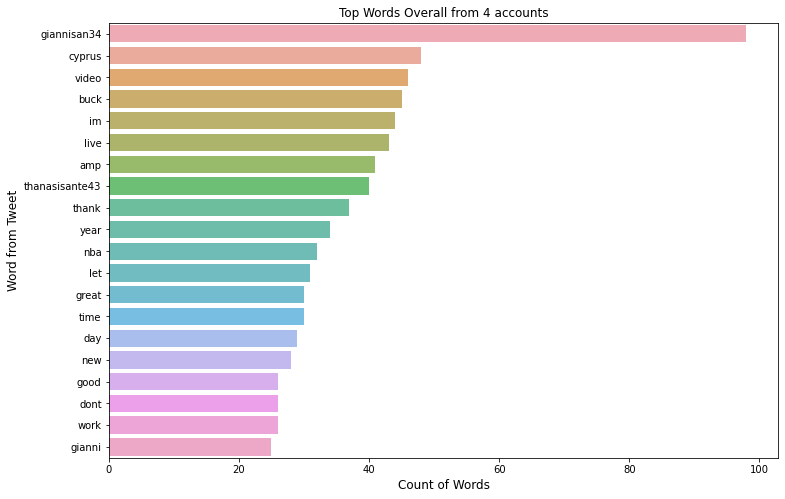

In [49]:
dfs_vis = dfs_vis[:20,] # set index
plt.figure(figsize=(12,8))
sns.barplot(dfs_vis.values, dfs_vis.index, alpha=0.8) # bar plot the dataframe
plt.title('Top Words Overall from 4 accounts')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

<ins>Fun fact</ins>: The top word is Giannis_An34, which it is clear that he is being a lot mentioned in the tweets of his brother Thanasis. The fact that Thanasis has mostly retweets, further justify that.

**Mentions**

How frequently are these accounts mentioned? Well, to find out, we now instructed the cursor to search for the specific query that involves the users' screen_names. We took a sample of 500 tweets and saved the results into the name (of the account mentioned) and kept a count for it.

In [50]:
name = []
mentioned = []

# search query cursor to find mentions from a sample of 500 tweets
cursor = tweepy.Cursor(api.search_tweets, q="Giannis_An34 OR Mrwhosetheboss OR AnastasiadesCY OR Thanasis_ante43", tweet_mode="extended").items(500)

for i in cursor:
    name.append(i.user.screen_name)
    mentioned.append(i.full_text)

In [51]:
#text -> pandas dataframe
df_mentioned = pd.DataFrame({'name':name, 'mentions':mentioned})
df_mentioned

,name,mentions
0,FicoGoatsquad,@DFS_D0E @Giannis_An34 🔥🔥🔥
1,b_crespo0821,@Oreo y’all about to give my man @Giannis_An34...
2,eurohoopsGR,"🦌 Συμπαίκτης του @Giannis_An34 ο ""Boogie"" που ..."
3,blasian1nvasion,@DFS_D0E @Giannis_An34 https://t.co/4EF9nqHmiQ
4,semna_k_tapeina,Και κάπως έτσι βγάζουμε κ εμείς το βάσανο μας ...
...,...,...
495,Susie120,@jp_stath @megynkelly @Giannis_An34 That they ...
496,dinosnicolaou,@br0ccolim0nti @437water @Giannis_An34 you are...
497,TGrugman,@br0ccolim0nti @Giannis_An34 Jason Tatum did.
498,DeborahAsimov,@NicolleDWallace @Giannis_An34 I cannot stop w...


In [52]:
# We follow same procedure we followed for the most frequently used words
s = [s for s in df_mentioned.mentions]

lines = []
for s in s:
    words = s.split()
    for w in words:
        lines.append(w)
        
lines = [re.sub(r'[^A-Za-z0-9]+', '', x)for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
        
stemmer = SnowballStemmer(language='english')

stem =[]
for word in lines2:
    stem.append(stemmer.stem(word))

In [53]:
stem2 = []

for word in stem:
    # APPEND word if and only if it is either of these 4 screen_names
    if word not in nlp.Defaults.stop_words:
        if word == "giannisan34":
            stem2.append(word)
        if word == "mrwhosetheboss":
            stem2.append(word)
        if word == "anastasiadescy":
            stem2.append(word)
        if word == "thanasisante43":
            stem2.append(word)

To sum up this process, we took 500 tweets that mentioned **either** of the 4 accounts. The tweets may mention sevaral times the account names that's why in a 500 sample we find out that the mentions of the accounts are more than 500. Results might change on live time run but for now:
- Antetokoumpo has 414 mentions
- Mrwhosetheboss has 46 mentions
- Anastasiades has 0 mentions
- Thanasis has 1 mention

In [54]:
df_mentioned = pd.DataFrame(stem2)
df_mentioned = df_mentioned.value_counts()
values = df_mentioned.count
# series object -> to_frame
mentioned_df = df_mentioned.to_frame()
mentioned_df

,0
0,
giannisan34,414
mrwhosetheboss,46
thanasisante43,1


**User Liked tweets**

The interaction each user has can be measured by many parameters. One might be the tweets that he likes. We iterated through the 4 accounts list and used the "favourites_count" function that returns the number of tweets user has liked. Mrwhosetheboss seems to spent enough time liking tweets and he comes up first in this one followed by Thanasis Antetokoumpo.

In [55]:
accounts = [user1, user2, user3, user4] # accounts list
interaction = 0
num = 0
username = 0

for num in accounts:
    user = api.get_user(screen_name = num)
    favourites_count = user.favourites_count # get likes
    print(str(num) + " has liked: " + str(favourites_count) + " tweets")
    if(favourites_count > interaction): # comparison of likes
        interaction = favourites_count
        username = num

print("\n" + "The user who does more likes is: " + str(username) + " with " + str(interaction) + " likes")

Giannis_An34 has liked: 2709 tweets
Mrwhosetheboss has liked: 11851 tweets
AnastasiadesCY has liked: 198 tweets
Thanasis_ante43 has liked: 10125 tweets

The user who does more likes is: Mrwhosetheboss with 11851 likes


---

To investigate the likes the users are getting in their tweets further, we designed a line plot visualising the number of likes vs date. 

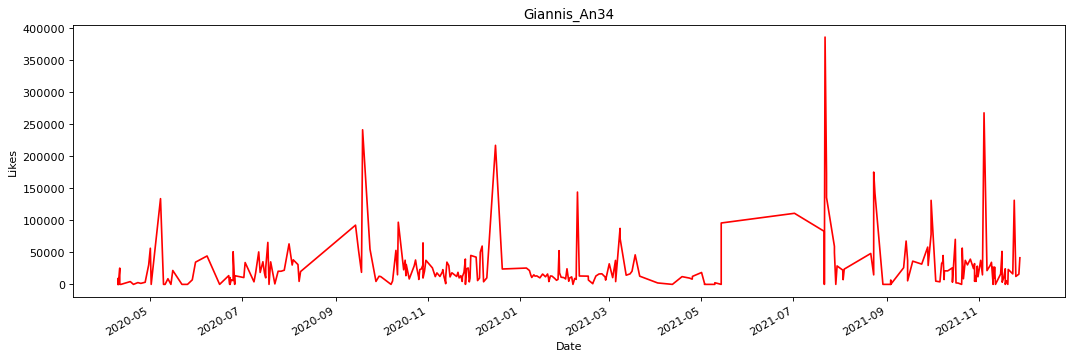

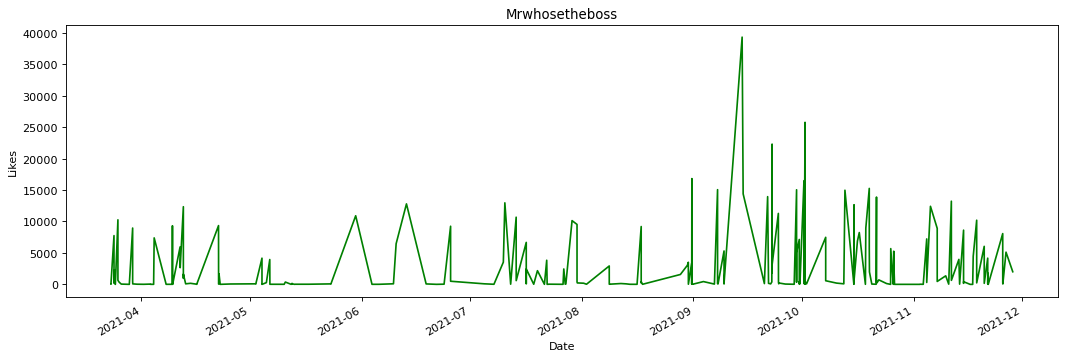

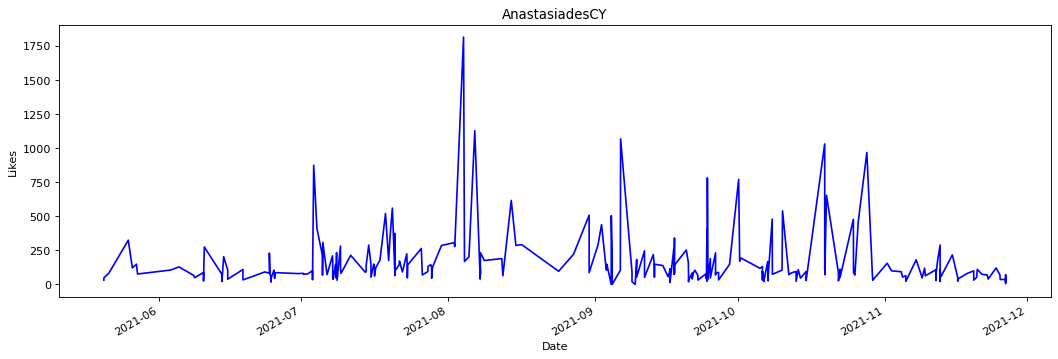

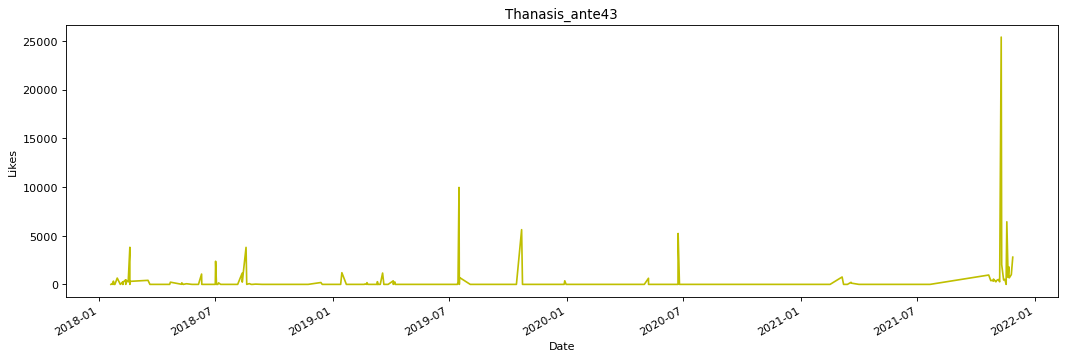

In [56]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

frames = [df, df1, df2, df3] #we will iterate these frames to print a plot separately
i = 0

for d in frames:
    figure(figsize=(16, 5), dpi=80) 
    time_tweets = pd.Series(data=d['likes'].values, index=d['time']) # create series
    # the if statement was needed so we could change title for each plot 
    if(i==0):
        plt.title(str(user1))
        time_tweets.plot(color ='r')
        i+=1
    elif(i==1):
        plt.title(str(user2))
        time_tweets.plot(color ='g')
        i+=1
    elif(i==2):
        plt.title(str(user3))
        time_tweets.plot(color ='b')
        i+=1
    elif(i==3):
        plt.title(str(user4))
        time_tweets.plot(color ='y')
        i+=1
    plt.xlabel("Date")
    plt.ylabel("Likes")
    plt.show()

A comment here is that we attempted to visualise them in 1 single plot, with different colours each to differ. But, due to the fact that the values are far apart, the visualisation wasn't efficient and we couldn't identify the results we wanted. Also Thanasis due to the fact that he mostly retweets, has a lot of 0 likes values.

---

The last analysis we did is to find the last 5 tweets the users have liked and save them at a separate txt file for each.

In [57]:
#returns the latest favorite statuses for the authenticating user or user specified by the ID parameter.
accounts = [user1, user2, user3, user4]
num = 0
# Cursor is the search method this search query will return 5 of the users latest favourite posts
for num in accounts:
    f= open(str(num) + "_" + "twitter_favs.txt","w+")
    for favorite in tweepy.Cursor(api.get_favorites, screen_name=num).items(5):

        # We capture basic information about the user who created the tweet that was favorited
        # write the info to file the screen name of user
        f.write('handle: '+str(favorite.user.screen_name.encode("utf-8"))+'\n')
        # Print the text of the tweet the user favorited
        f.write('tweet: '+str(favorite.text.encode("utf-8"))+'\n' + '\n')
        # We encoded the data to utf-8 to avoid the program from crashing

    f.close() 

**Learnings and Findings**

The processes that we followed in this task were made to investigate in detail the twitter accounts. We made use of plotting at some points to capture trends and come up with findings, we contrasted number of followers/likes etc. What we can clearly see now is that Giannis Antetokoumpo is indeed the most succesful account in most of the factors.

In this task we encountered only 1 Rate Limit which is pointed in red colour. 

> <font size = "4"><ins>**Task 3**</ins> - Network Analysis </font>

This task utilizes a network representing the area of influence of the 4 accounts, considering their friends, and sample of their follows/followings. Developing the graphs enabled us to investigate in an efficient and well-structured manner the data, extract information and apply statistical calculations. Furthermore, we visualised statistical data using matplotlib and seaborn libraries to further understand them, and define some results. The graph includes nodes, representing the different users, and edges which are the links connecting them. 

Very important note is that we have 2 levels of connection that we investigated:
1. <font color='blue'>Friend (followed and follow back)</font> 
2. <font color='red'>Following or Followed by</font> 

So we differentiate our graph edges according to this attribute. If 2 users are connected with a <font color='blue'>blue line</font>  it means they both follow each other and they are friends. If they are connected with a <font color='red'>red line</font> , it means that one of them follows the other.

Networkx is the Python package we have used to implement the network graphs and the statistics. Its powerful functions and capabilities enabled us to construct the nodes and their connections, and manipulate it. 

**Friends Extraction**

Firstly, we are going to extract a fix number of our user's friends. We can do that using api.get_friends function and a list is created to save the screen_names of each user for later use for developing the network. 

In [58]:
friends_ante = [None] * 6 # initialize list with the number of friends to be gathered
i = 0 # iterator

# iterate through user's friends and "pick" the first 6
for user in tweepy.Cursor(api.get_friends, screen_name=user1).items(6):
    print('friend: '+ user.screen_name)
    friends_ante[i] = user.screen_name # save the friend to the list
    i += 1

friend: alex_ante34
friend: veronica_ante34
friend: mariahdanae15
friend: Kostas_ante13
friend: kobebryant
friend: Thanasis_ante43


In [59]:
friends_anast = [None] * 9
i = 0

for user in tweepy.Cursor(api.get_friends, screen_name=user3).items(9):
    print('friend: '+ user.screen_name)
    friends_anast[i] = user.screen_name 
    i += 1

friend: KingAbdullahII
friend: Tokyo2020
friend: Olympics
friend: AndrejPlenkovic
friend: Grybauskaite_LT
friend: naftalibennett
friend: Isaac_Herzog
friend: NParisinou
friend: PelekanosMarios


In [60]:
friends_boss = [None] * 10
i = 0

for user in tweepy.Cursor(api.get_friends, screen_name = user2).items(10):
    print('friend: '+ user.screen_name)
    friends_boss[i] = user.screen_name 
    i += 1

friend: ColinandSamir
friend: Alorux
friend: The_Milkssiah
friend: NikitaKanda
friend: wroetoshaw
friend: BenFrancis1992
friend: GordonRamsay
friend: IAmAlanWalker
friend: HHillierSmith
friend: rkyncl


In [61]:
friends_thanasis = [None] * 10
i = 0

for user in tweepy.Cursor(api.get_friends, screen_name = user4).items(10):
    print('friend: '+ user.screen_name)
    friends_thanasis[i] = user.screen_name 
    i += 1

friend: JordanNwora
friend: Lingopietv
friend: thistragic_j
friend: pmabucks
friend: EdenCheckol
friend: TrekBikes
friend: ShamsCharania
friend: SheaSerrano
friend: stylebender
friend: WenyenGabriel


In case, that a user is added to the friend list of another user will cause problems on later tasks where the network will be implemented between each account seperately, therefore we do not want to include him twice. This is a problem that we encountered with Giannis and Thanasis being friends, and causing a clonflict. To counter that, we developed the code below that separates the friends of our users, from the actual users.

In [62]:
lists = [friends_anast, friends_boss, friends_ante, friends_thanasis] # merge lists for quick access

# iterate through each string separately
for i in lists:
    for j in i: 
        if (j == user1 or j == user2 or j == user3 or j == user4): # if a friend is a user
            i.remove(j) # remove him from friendlist
print(friends_ante)

['alex_ante34', 'veronica_ante34', 'mariahdanae15', 'Kostas_ante13', 'kobebryant']


We begin to develop the network by checking for connections between each of the user's friends. There are 3 arrays initialized where the connection details will be saved. The "source" and "friends" lists indicates the accounts that are connected, and the "weight" indicates the connection level. We minimize the complexity of the network by restricting the number of connections to 50. 

<font color='red'>**RATE LIMIT**</font>

In [63]:
source = [0] * 50 
friends = [0] * 50
weight = [0] * 50
num = 0 # index for the 3 lists

# This functions iterates through 2 friend lists and checks each account of the first lists for connection
# with each of the accounts from the second list. If the connection is at a "friend" level the weight at
# the current index is set to 1.
#
# parameters:
# friends1, friends2 - the lists with the friends of the users
# num - the current index of the arrays
def friends_of_friends(friends1, friends2, num): 
    for i in friends1:
        source_screen_name = i 
        for j in friends2:
            target_screen_name = j
            # returns detailed information about the relationship between two arbitrary users
            friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
            # checks if target follows the source
            if friendship[0].followed_by == True:                      
                friends[num] = j # saves the screen_name at index num
                source[num] = i  # saves the screen_name at index num
                # checks if source follows the target too, thus connection is at friend level
                if friendship[0].following == True:
                    weight[num] = 1 
                    num += 1 # increment the index by 1 
                else:
                    num += 1
            elif friendship[0].following == True:
                friends[num] = j
                source[num] = i
                num += 1
    return num

# "num" value is returned and saved after the operation of the function 
# all of the possible combinations are checked
num = friends_of_friends(friends_anast, friends_ante, num)
num = friends_of_friends(friends_anast, friends_boss, num)
num = friends_of_friends(friends_anast, friends_thanasis, num)
num = friends_of_friends(friends_ante, friends_boss, num)
num = friends_of_friends(friends_ante, friends_thanasis, num)
num = friends_of_friends(friends_boss, friends_thanasis, num)

Rate limit reached. Sleeping for: 854
Rate limit reached. Sleeping for: 860


At this stage we will check for "internal" realationships. We will iterate through each friend list to find connections between the accounts. We also implemented a Flow Chart Diagram explaining the code, because due to rate limit delay we didn't manage to compute a function. The algorithm though is the same. 

In the actual code you will observe a print statement in comments for debug purposes, this also was the way to compute the algorithm of iterating and comparing the elements inside a list avoiding any rate limits.

<font color='red'>**RATE LIMIT**</font>

In [64]:
j = 1    # index for target account
i = 0    # index for source account
b = True # boolean to keep while loop running

# we customized the indexes for the friend list and inside the while loop they are incremented appropriately
# the idea is comparing the account of the first index with the rest and then continue to the second and so on
while b:
    source_screen_name = friends_anast[i]
    target_screen_name = friends_anast[j]
    ### print(friends_anast[i], friends_anast[j]) -> debug purposes ###  
    # returns detailed information about the relationship between two arbitrary users
    friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
    if friendship[0].followed_by == True:                      
        friends[num] = friends_anast[j] # saves the screen_name at index num
        source[num] = friends_anast[i]  # saves the screen_name at index num
        if friendship[0].following == True:
            weight[num] = 1 # saves the weight value at index num they are friends
            num += 1
        else:
            num += 1
    elif friendship[0].following == True:
        friends[num] = friends_anast[j]
        source[num] = friends_anast[i]
        num+=1
    j += 1             # increment target's index
    if j == 9:         # if index of target is equal to the size of the list (last index)
        i += 1         # increment source's index
        j = i + 1      # set target's index to 1 position after source
        if (i == 8):   # if index of source is equal to the size of the list - 1 position (last comparisson)
            b = False  # end the loop

# repeat the same algorithm for the rest of the friend lists
j = 1
i = 0
b = True

while b:
    source_screen_name = friends_ante[i]
    target_screen_name = friends_ante[j]
    friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
    if friendship[0].followed_by == True:                      
        friends[num] = friends_ante[j]
        source[num] = friends_ante[i]
        if friendship[0].following == True:
            weight[num] = 1;
            num += 1
        else:
            num += 1
    elif friendship[0].following == True:
        friends[num] = friends_ante[j]
        source[num] = friends_ante[i]
        num += 1
    j += 1
    if j == 5:
        i += 1
        j = i + 1
        if (i == 4):
            b = False
            
j = 1
i = 0
b = True

while b:
    source_screen_name = friends_boss[i]
    target_screen_name = friends_boss[j]
    friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
    if friendship[0].followed_by == True:                      
        friends[num] = friends_boss[j]
        source[num] = friends_boss[i]
        if friendship[0].following == True:
            weight[num] = 1
            num += 1
        else:
            num += 1
    elif friendship[0].following == True:
        friends[num] = friends_boss[j]
        source[num] = friends_boss[i]
        num += 1
    j += 1
    if j == 10:
        i += 1
        j = i + 1
        if (i == 9):
            b = False
            
j = 1
i = 0
b = True
while b:
    source_screen_name = friends_thanasis[i]
    target_screen_name = friends_thanasis[j]
    friendship = api.get_friendship(source_screen_name = source_screen_name, target_screen_name = target_screen_name)
    if friendship[0].followed_by == True:                      
        friends[num] = friends_thanasis[j]
        source[num] = friends_thanasis[i]
        if friendship[0].following == True:
            weight[num] = 1;
            num += 1
        else:
            num += 1
    elif friendship[0].following == True:
        friends[num] = friends_thanasis[j]
        source[num] = friends_thanasis[i]
        num += 1
    j += 1
    if j == 10:
        i += 1
        j = i + 1
        if (i == 9):
            b = False

Rate limit reached. Sleeping for: 740


**Flow Chart Diagram**

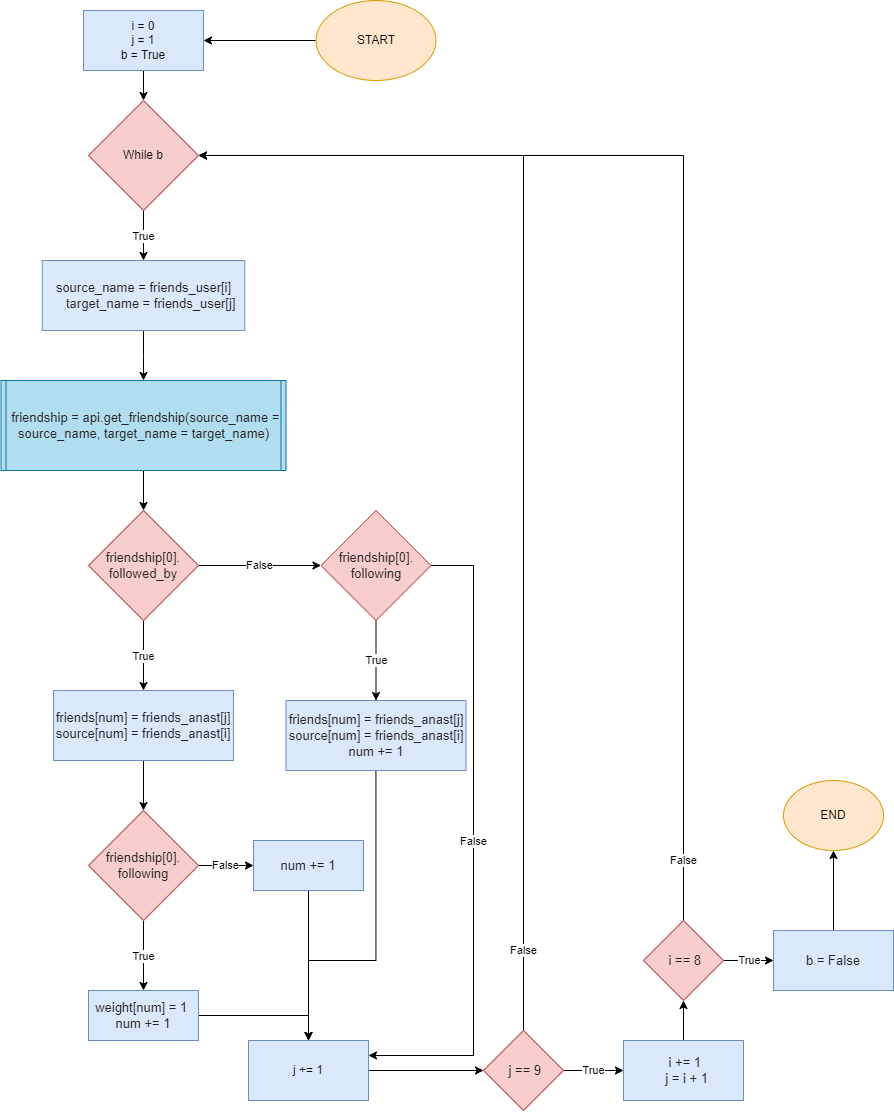

---

We currently developed the network's connections between the friends of our users. Now we will save the realtionship between the users and their captured friends to new lists, setting their "weight value" to 1. Next step is to capture the friends of our users and save them into the some_friends list.

In [65]:
some_friends = []
some_source = []

# returns a user’s friends 
for friend in tweepy.Cursor(api.get_friends, screen_name = user3,  tweet_mode="extended").items(9):
    some_source.append(str(user3))           # save source account
    some_friends.append(friend.screen_name)  # save target account
for friend in tweepy.Cursor(api.get_friends, screen_name = user2,  tweet_mode="extended").items(10):
    some_source.append(str(user2))
    some_friends.append(friend.screen_name)
for friend in tweepy.Cursor(api.get_friends, screen_name = user1,  tweet_mode="extended").items(10):
    some_source.append(str(user1))
    some_friends.append(friend.screen_name)
for friend in tweepy.Cursor(api.get_friends, screen_name = user4,  tweet_mode="extended").items(10):
    some_source.append(str(user4))
    some_friends.append(friend.screen_name)

some_weight = [1]*len(some_friends) # weight list with all values = 1

The first dataframe that we will use for the network is being initialised here with the friends we captured at the last step.

In [66]:
network = pd.DataFrame({'from': some_source,'to':some_friends})
network

,from,to
0,AnastasiadesCY,KingAbdullahII
1,AnastasiadesCY,Tokyo2020
2,AnastasiadesCY,Olympics
3,AnastasiadesCY,AndrejPlenkovic
4,AnastasiadesCY,Grybauskaite_LT
5,AnastasiadesCY,naftalibennett
6,AnastasiadesCY,Isaac_Herzog
7,AnastasiadesCY,NParisinou
8,AnastasiadesCY,PelekanosMarios
9,Mrwhosetheboss,ColinandSamir


During the capture of friends network we encountered some 0 values in our list because of the pre-set size we defined. To fix this we removed all the rows after "num" value, which is equal to the final valid connection from that network. This is the second dataframe, that will later be combined to compute the overall network.

In [67]:
friends_network = pd.DataFrame({'from': source,'to':friends})
friends_df = friends_network[0:num] # keep only values from 0 to num = 26
friends_df

,from,to
0,Olympics,kobebryant
1,Olympics,GordonRamsay
2,kobebryant,GordonRamsay
3,alex_ante34,pmabucks
4,mariahdanae15,pmabucks
5,kobebryant,ShamsCharania
6,GordonRamsay,TrekBikes
7,GordonRamsay,stylebender
8,Tokyo2020,Olympics
9,Olympics,AndrejPlenkovic


**Concatenate and finalize network's dataframe**

This step will concatenate the 2 dataframes we mentioned above. The first one (network) contains all the actual friends of the accounts we captured. The 2nd one is the one we got into more detail with, to be as more accurate as possible. The question we asked ourselves that gave us the motivation to do it is: What if Gianni's friend, follows Boss's friend, or anyone else. The combination of these two will give us the final network dataframe that will be plotted in our graph representation.

In [68]:
final_network = pd.concat([network, friends_df], axis=0)
final_network = final_network.reset_index(drop=True)
final_network

,from,to
0,AnastasiadesCY,KingAbdullahII
1,AnastasiadesCY,Tokyo2020
2,AnastasiadesCY,Olympics
3,AnastasiadesCY,AndrejPlenkovic
4,AnastasiadesCY,Grybauskaite_LT
...,...,...
57,wroetoshaw,IAmAlanWalker
58,JordanNwora,pmabucks
59,pmabucks,ShamsCharania
60,ShamsCharania,SheaSerrano


**Creation of networkx graph**

To create our network we used the function from_pandas_edgelist that returns a graph from Pandas DataFrame containing an edge list.The Pandas DataFrame contains two columns of node names from and to. Each row will be processed as one edge instance. Information of our graph is printed using the info() Function. It is printing details like the number of nodes, edges and gives an average degree.

In [69]:
import networkx as nx

G = nx.from_pandas_edgelist(final_network, 
                            source='from',
                            target='to')
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 38\nNumber of edges: 62\nAverage degree:   3.2632'

**Draw of graph**

We have chosen kamada_kawai layout to draw our graph because it gives a clear representation of the nodes and their connections. At this stage we differentiate the connections according to their weight and create our edgelist that will be drawn with different colour. 

All the edges are drawn in red colour (0 weight, meaning either following or followed by) but if the weight is 1 then we add that weight value in the nFriends and nSource lists. These 2 lists are zipped and the values we passed are stored in pairs:
eg. (Friend[1], Source[1]), (Friend[2], Source[2]), ...

Then, that zip object will be transformed into a set to represent our edge list. Everything under that edgelist will be drawn with blue colour, indicating that their connection level is friends.

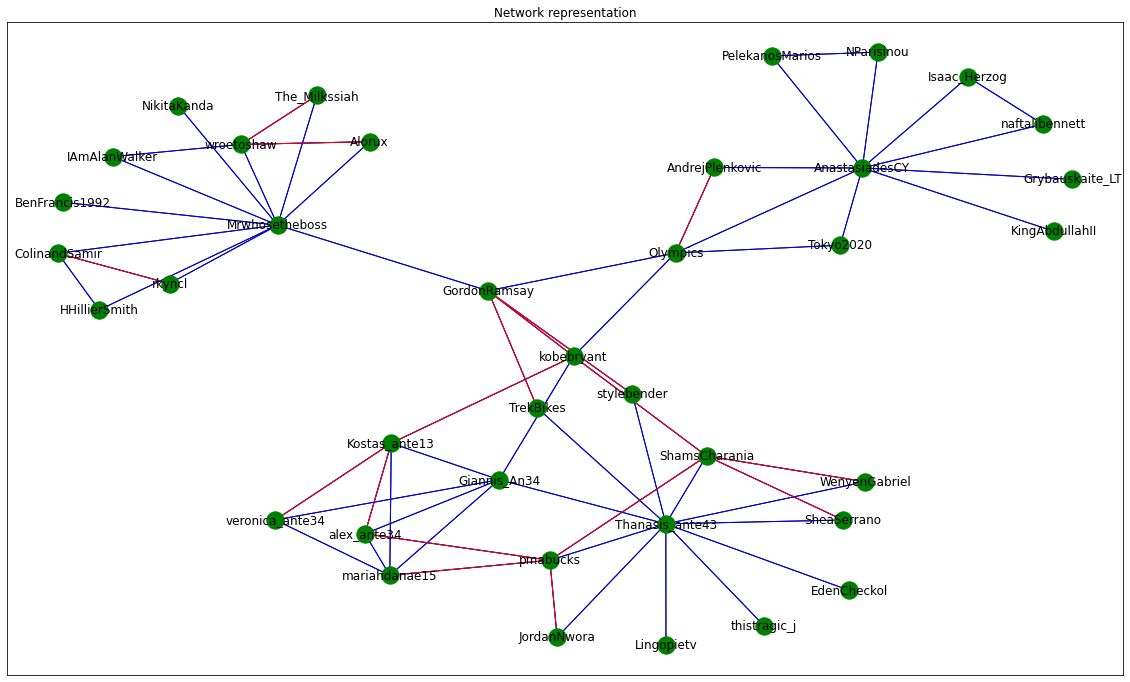

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

i = 0
edgelist = []
nFriends = []
nSource = []

figure(figsize=(20,12))
plt.figure(1)
pos = nx.kamada_kawai_layout(G) # layout of graph
for w in weight: # iterate all weights in list   
    if (w == 0):
        if(i == num):
            break
        else:
            nFriends.append(friends[i])
            nSource.append(source[i])
    i += 1 
    
conn_list = zip(nFriends, nSource)
connected = set(conn_list)
nx.draw_networkx(G, pos, node_color='g', node_size= 300)
nx.draw_networkx_edges(G,pos, edge_color='b', width=1)
nx.draw_networkx_edges(G,pos, edgelist = connected, edge_color='r', width = 1)

plt.title("Network representation")
plt.show()

Below, we draw again our graph in a shell layout that gives another beautiful view of our network representation.

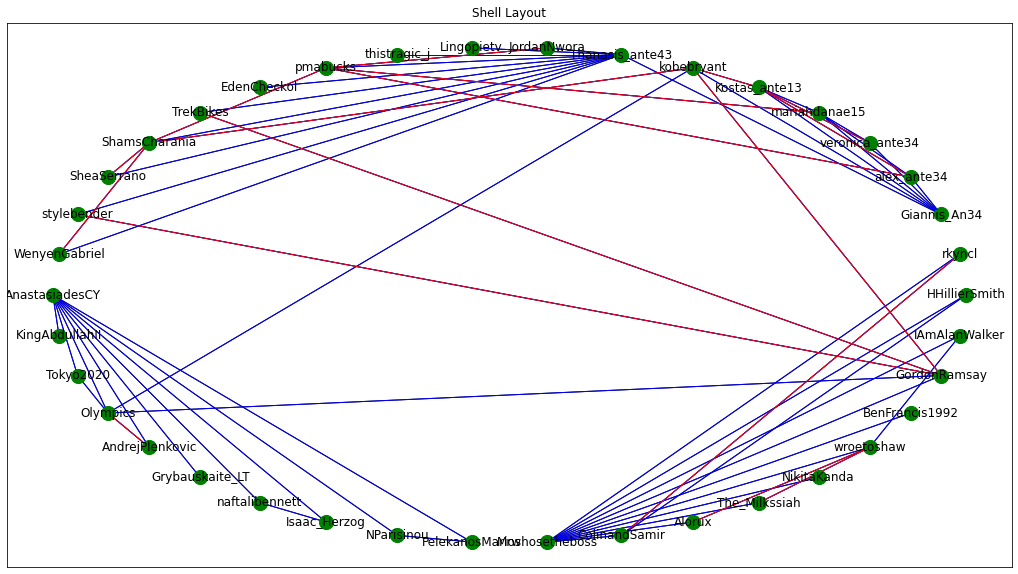

In [71]:
figure(figsize=(18,10))
plt.figure(1)
pos = nx.shell_layout(G)
nx.draw_networkx(G, pos, node_color='g', node_size= 200)
nx.draw_networkx_edges(G,pos, edge_color='b', width=1)
nx.draw_networkx_edges(G,pos, edgelist = connected, edge_color='r', width = 1)
plt.title("Shell Layout")
plt.show()

**Degree Distribution**

The following function shows the node degree, which is the number of edges adjacent to the node. A histogram is plotted to visualize this. It's obvious that the users we are researching for will have the highest degree distribution, but we found interesting that other accounts have pretty high degree distribution too eg. Olympics, Gordon Ramsay etc. 

In [72]:
nx.degree(G)

DegreeView({'AnastasiadesCY': 9, 'KingAbdullahII': 1, 'Tokyo2020': 2, 'Olympics': 5, 'AndrejPlenkovic': 2, 'Grybauskaite_LT': 1, 'naftalibennett': 2, 'Isaac_Herzog': 2, 'NParisinou': 2, 'PelekanosMarios': 2, 'Mrwhosetheboss': 10, 'ColinandSamir': 3, 'Alorux': 2, 'The_Milkssiah': 2, 'NikitaKanda': 1, 'wroetoshaw': 4, 'BenFrancis1992': 1, 'GordonRamsay': 5, 'IAmAlanWalker': 2, 'HHillierSmith': 2, 'rkyncl': 2, 'Giannis_An34': 6, 'alex_ante34': 4, 'veronica_ante34': 3, 'mariahdanae15': 5, 'Kostas_ante13': 5, 'kobebryant': 5, 'Thanasis_ante43': 11, 'JordanNwora': 2, 'Lingopietv': 1, 'thistragic_j': 1, 'pmabucks': 5, 'EdenCheckol': 1, 'TrekBikes': 2, 'ShamsCharania': 5, 'SheaSerrano': 2, 'stylebender': 2, 'WenyenGabriel': 2})

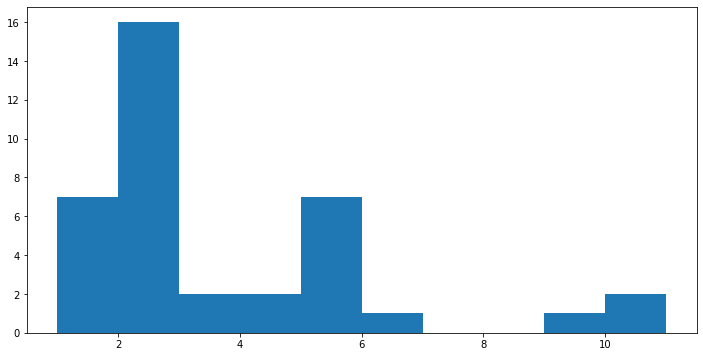

In [74]:
# produces a histogram representing the degree distribution
#
# parameter: 
# G - the graph
def plot_degree_dist(G):
    figure(figsize=(12,6))
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G)

**Degree Centrality**

Using degree centrality we were able to identify the "most_influential" user in terms of the connections he has, with Thanasis being the most influential, followed by Mrwhosetheboss.

In [75]:
most_influential = nx.degree_centrality(G)
for w in sorted(most_influential, key=most_influential.get, reverse=True): # sort them and print name of user
    print(w, most_influential[w])

Thanasis_ante43 0.2972972972972973
Mrwhosetheboss 0.2702702702702703
AnastasiadesCY 0.24324324324324326
Giannis_An34 0.16216216216216217
Olympics 0.13513513513513514
GordonRamsay 0.13513513513513514
mariahdanae15 0.13513513513513514
Kostas_ante13 0.13513513513513514
kobebryant 0.13513513513513514
pmabucks 0.13513513513513514
ShamsCharania 0.13513513513513514
wroetoshaw 0.10810810810810811
alex_ante34 0.10810810810810811
ColinandSamir 0.08108108108108109
veronica_ante34 0.08108108108108109
Tokyo2020 0.05405405405405406
AndrejPlenkovic 0.05405405405405406
naftalibennett 0.05405405405405406
Isaac_Herzog 0.05405405405405406
NParisinou 0.05405405405405406
PelekanosMarios 0.05405405405405406
Alorux 0.05405405405405406
The_Milkssiah 0.05405405405405406
IAmAlanWalker 0.05405405405405406
HHillierSmith 0.05405405405405406
rkyncl 0.05405405405405406
JordanNwora 0.05405405405405406
TrekBikes 0.05405405405405406
SheaSerrano 0.05405405405405406
stylebender 0.05405405405405406
WenyenGabriel 0.0540540

**Shortest Path**

We developed a system that will indicate the shortest path from one node to another. The path is being highlighted on our graph in red colour. Here is an example of the shortest path between: pmabucks and AnastasiadesCY.

['pmabucks', 'ShamsCharania', 'kobebryant', 'Olympics', 'AnastasiadesCY']


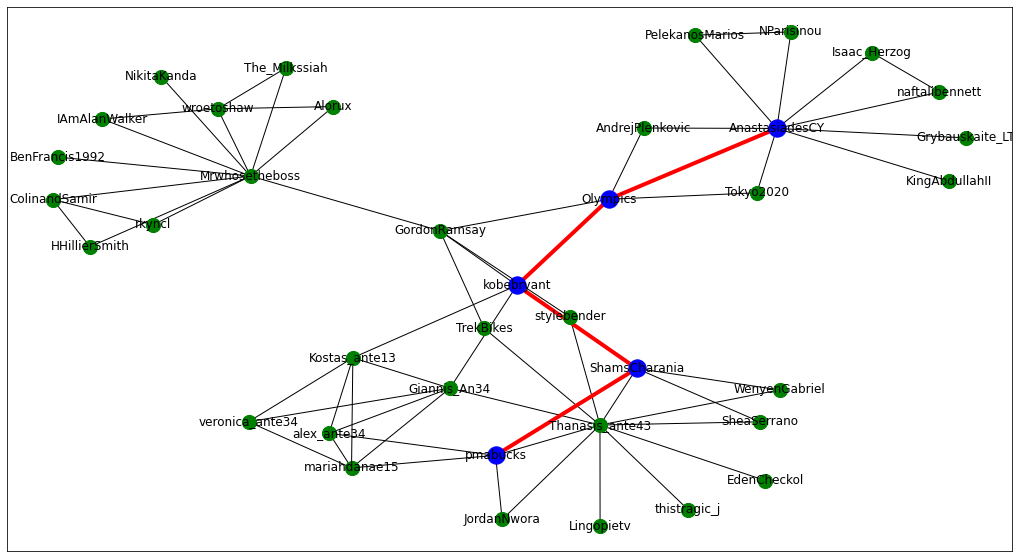

In [79]:
def shortest_path_func(src, trgt):
    path = nx.shortest_path(G, src, trgt) # find the path
    print(path)

    figure(figsize=(18,10))
    plt.figure(1)

    path_edges = zip(path,path[1:]) # make pairs of the path edges using zip
    path_edges = set(path_edges) # zip obj -> set

    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx(G, pos, node_color='g', node_size= 200)
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='b') # draw graph
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=4) # highlight shortest path in red

    plt.show()

shortest_path_func("pmabucks", user3)

**Betweeness Centrality**

Betweeness centrality determines the node who can access any other node with the shortest path. More generally, the betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex. The query's result suggest that Gordon Ramsay's position at the graph will have the highest betweeness centrality and indeed he does.

In [80]:
best_betweener = nx.betweenness_centrality(G)
for w in sorted(best_betweener, key=best_betweener.get, reverse=True):
    print(w, best_betweener[w])

GordonRamsay 0.4767267267267267
Mrwhosetheboss 0.4219219219219219
Olympics 0.3791291291291291
AnastasiadesCY 0.29954954954954954
kobebryant 0.29579579579579585
Thanasis_ante43 0.27139639639639646
Giannis_An34 0.10560560560560557
ShamsCharania 0.09684684684684684
TrekBikes 0.07582582582582584
stylebender 0.07582582582582584
Kostas_ante13 0.05042542542542543
pmabucks 0.0254004004004004
mariahdanae15 0.004879879879879879
wroetoshaw 0.0022522522522522522
alex_ante34 0.0017517517517517515
ColinandSamir 0.0007507507507507507
KingAbdullahII 0.0
Tokyo2020 0.0
AndrejPlenkovic 0.0
Grybauskaite_LT 0.0
naftalibennett 0.0
Isaac_Herzog 0.0
NParisinou 0.0
PelekanosMarios 0.0
Alorux 0.0
The_Milkssiah 0.0
NikitaKanda 0.0
BenFrancis1992 0.0
IAmAlanWalker 0.0
HHillierSmith 0.0
rkyncl 0.0
veronica_ante34 0.0
JordanNwora 0.0
Lingopietv 0.0
thistragic_j 0.0
EdenCheckol 0.0
SheaSerrano 0.0
WenyenGabriel 0.0


**Cluster Coefficient**

We calculate clustering of each account which is a measure of the density of the network for each vertex. Meaning that if there are many followings between each accounts network from the other nodes, the density will be higher. Making clustering the measure of density between each nodes network. We used a barplot to visualise the clustering coefficients of our network.

In [91]:
cluster = nx.clustering(G)
keys = cluster.keys()
values = sorted(cluster.values(), reverse = True)

df_plot = pd.DataFrame({'name': keys, 'clustering': values})
df_plot

,name,clustering
0,AnastasiadesCY,1.000000
1,KingAbdullahII,1.000000
2,Tokyo2020,1.000000
3,Olympics,1.000000
4,AndrejPlenkovic,1.000000
5,Grybauskaite_LT,1.000000
6,naftalibennett,1.000000
7,Isaac_Herzog,1.000000
8,NParisinou,1.000000
9,PelekanosMarios,1.000000


It seems that only Anastasiades and Mrwhosetheboss from our users have high cluster coefficient. 

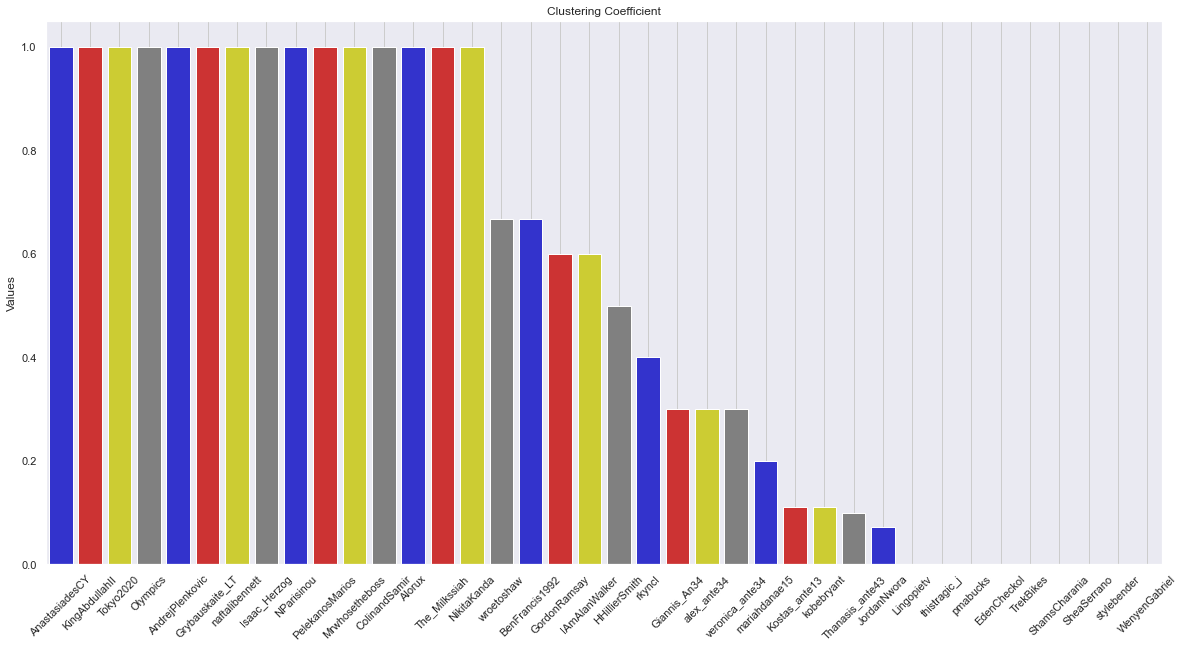

In [92]:
sns.set(rc={'figure.figsize':(20,10)})
plt.figure()
# Barplot creation
ax = sns.barplot(data=df_plot, x="name", y="clustering", palette=['blue', 'red', 'yellow', 'grey'], saturation=0.6)

# Customise some display properties
ax.set_title('Clustering Coefficient')
ax.grid(color='#cccccc')
ax.set_ylabel('Values')
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45) # put 45 degree angle to x-axis labels to be more readable

plt.show()

**Eigenvalue vectors**

For further network investigation we calculated the eigenvalue vectors and plotted them in a histogram.

Largest eigenvalue: 1.7829504282177062
Smallest eigenvalue: 1.1796119636642288e-16


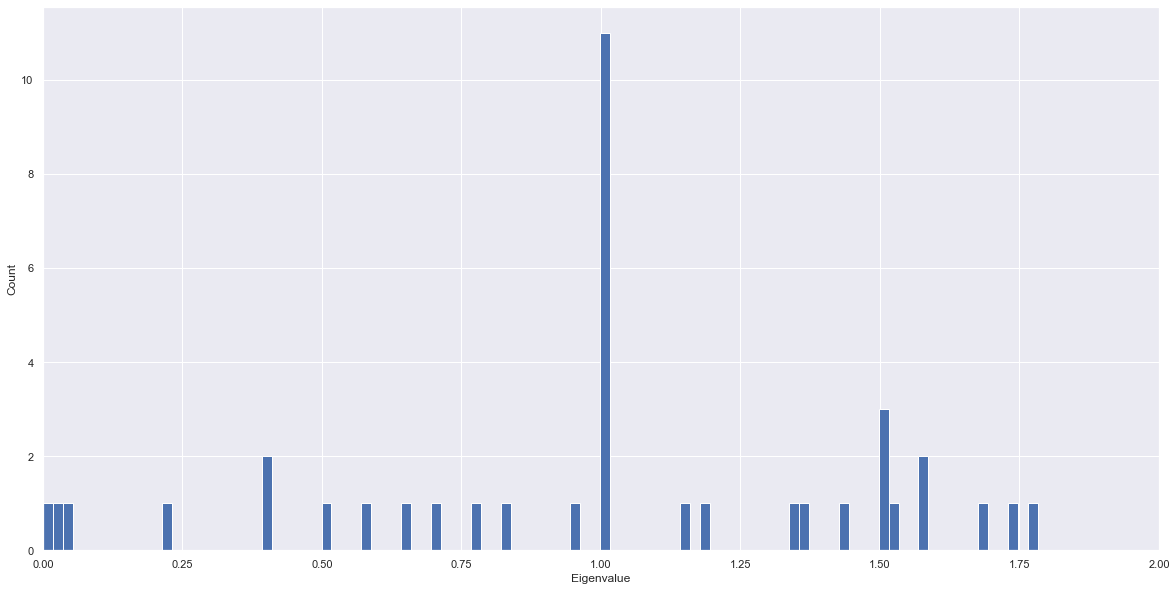

In [93]:
import numpy as np

z = nx.normalized_laplacian_matrix(G) # find largest eigen value
e = np.linalg.eigvals(z.A) # find smallest eigen value

print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))

plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.xlabel("Eigenvalue")
plt.ylabel("Count")

plt.show()

**Assortativity**

Assortativity measures the similarity of connections in the graph with respect to the node degree. The assortativity ranges from –1 to +1, positive values meaning a tendency for nodes of similar degrees to connect to each other, negative values means that large-degree nodes tend to attach to low- degree nodes

In [94]:
nx.degree_assortativity_coefficient(G)

-0.5785791314868884

**Learnings and Findings**

During the procedure of implementing such a network, resulted on learing various techniques to manipulate the data. There were many unexpected results in our findings, for example Gordon Ramsay turned out to have the "best" position in the graph, and this can be justified with the betweeness centrality results, where he came on top. At the early stage of developing the network, we couldn't find any connection between the friends of the accounts. This is when we decided to take it into a deeper level and search for connections between each acocunt in the network. This resulted in the most exciting part, producing a well-connected network between the 4 users, with a lot of edges(62). What we wanted to focus on, in this development though, is to automate as many as possible of these operations. One of the hardest operation to do so, was the queries that resolved the connections of our network which were firstly manually imported.

---

# Conclusion and Reflections

In conclusion, Twitter is indeed a very powerful platofrm, with endless possibilities. Extracting, analysing, and visualising all these data in a secure manner, with compliance to all privacy rules. It is iconic how much you can understand of a person with just searching some data workflows on his tweets. 

This project has been a joy to work on. It was something we have never experimented with before and required a lot of structural thinking in order to pull it off. Collecting the data, manipulating them and constructing  the visualisations gave us all the detail we wanted and even more. The fact that there are so many ways to present/visualize a dataset, but only one will give you exactly what you need, is remarkable. Furthermore, the network we produced can now work for any given users with the minimal change of the users variables. Working with lists and iterating their objects proved to be very efficient for us and we could access everything we needed, with shorter code. 

Working on this project enhanced our skills on one of the most useful and powerful programming languages, Python. We made use of lists, sets, dictionaries and a lot of built-in functions etc. In addition, for the purpose of gathering, handling and visualizing the data we used several libraries, that will be very helpful for us in the future.

As a reflection, we want to point the fact of the limited pull requests tweepy has, that caused us serious delays by reaching that limit, although we did find some workarounds on several situations. To further extend this project, and make it better, we wanted to develop a function for the internal search part in Task 3, but the rate limit prevented us from doing so. We are looking forward on expanding our Data Science skills even further in the future and we want to say that this project has been the perfect starting point to this journey.